## Class Activation Map

<p align="center"><img src="https://johfischer.com/wp-content/uploads/2022/01/slide7-1-1024x376.png"></img></p>

Class activation maps (CAMs) are a type of visualization technique used in computer vision to understand how convolutional neural networks (CNNs) make their predictions. CAMs highlight the regions of an image that were most important in making a particular classification decision by generating a heatmap over the image.

The original paper on class activation maps is titled "Learning Deep Features for Discriminative Localization" and was published in the IEEE Conference on Computer Vision and Pattern Recognition (CVPR) in 2016. The paper was authored by Bolei Zhou, Aditya Khosla, Agata Lapedriza, Aude Oliva, and Antonio Torralba, and is available on the CVPR website and on arXiv. [Link](https://openaccess.thecvf.com/content_cvpr_2016/papers/Zhou_Learning_Deep_Features_CVPR_2016_paper.pdf)



## Library

The code you posted is a Python script that imports several Python libraries and modules:

`cv2`: This is the OpenCV library, which provides computer vision and image processing functions.

`numpy`: This is a popular numerical computing library for Python, which provides support for arrays and matrices, as well as many mathematical functions.

`matplotlib.pyplot`: This is a plotting library for Python, which provides functions for creating graphs and charts.

`tensorflow`: This is a popular open-source machine learning library developed by Google, which provides tools for building and training deep neural networks.

`tensorflow.keras.applications.resnet50`: This is a module from the Keras API in TensorFlow, which provides a pre-trained ResNet50 model for image classification.

`tensorflow.keras.models`: This is another module from the Keras API in TensorFlow, which provides tools for building and training deep learning models, including the ResNet50 model.

In addition to importing these libraries and modules, the script defines an alias for the `ResNet50` model and the Model class from `tensorflow.keras.models`, using the as keyword. This makes it easier to refer to these objects later in the script.

Overall, this code sets up the environment for loading a pre-trained ResNet50 model, preprocessing an input image, and generating a class activation map for the image using the ResNet50 model.





In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model

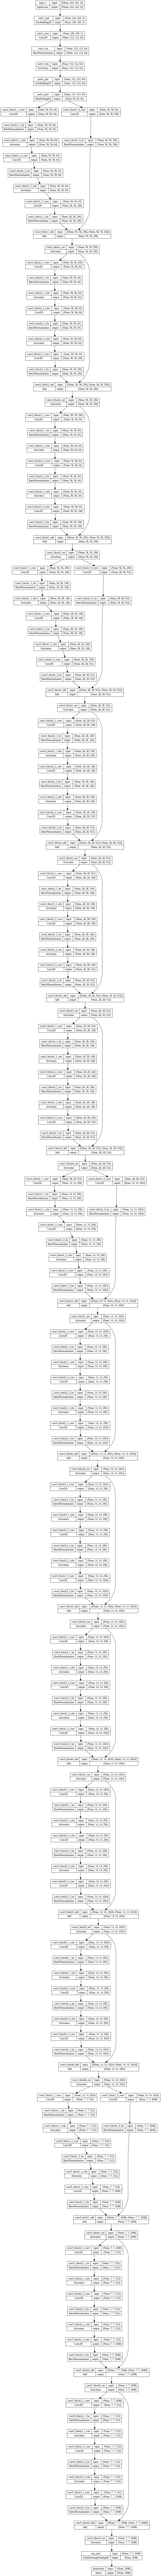

In [2]:
# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet')
# Get the output of the last convolutional layer
last_conv_layer = base_model.get_layer('conv5_block3_out')
# Get the output of the model up to the last convolutional layer
model = Model(inputs=base_model.input, outputs=[last_conv_layer.output, base_model.output])

# Summary
tf.keras.utils.plot_model(model, show_shapes=True)

This code loads an image file named "tesla.jpg" located at "/content/tesla.jpg" and preprocesses it to prepare it as input to a deep learning model.

The first line of the code sets the `img_path` variable to the path of the image file.

The second line loads the image using the `load_img()` function from the `tf.keras.preprocessing.image` module, and resizes it to a target size of (224, 224) pixels using the target_size argument. This function returns a PIL (Python Imaging Library) image object.

The third line converts the `PIL` image to a Numpy array using the `img_to_array()` function from the `tf.keras.preprocessing.image` module. This function converts the PIL image to a 3D Numpy array, where the dimensions are (height, width, channels).

The fourth line expands the dimensions of the Numpy array to (1, height, width, channels) using the `expand_dims()` function from the numpy module. This adds an extra dimension to the array at position 0, which represents the batch size of the input to the deep learning model. In this case, the batch size is 1 because we are only processing a single image.

The fifth line applies the preprocessing function `preprocess_input()` from the `tensorflow.keras.applications.resnet50` module to the Numpy array. This function applies specific preprocessing steps to the image to make it suitable for input to a ResNet50 model, such as mean subtraction and scaling.

Overall, this code prepares the image file for input to a deep learning model by loading it, resizing it, converting it to a Numpy array, expanding its dimensions to include a batch size of 1, and preprocessing it.

In [3]:
# Load an image and preprocess it
img_path = '/content/tesla.jpg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [4]:
# Get the output of the last convolutional layer and the predicted class
last_conv_output, predictions = model.predict(x)
predicted_class = np.argmax(predictions)
last_conv_output.shape, predictions.shape, predicted_class

1/1 [==============================] - 2s 2s/step


((1, 7, 7, 2048), (1, 1000), 656)

The *predicted_class* is the index of the actual object/label. Please see [here](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a) for a list of objects.

In [5]:
# Params
w, h = 7, 7

In [6]:
# Define a function to generate the class activation map
def generate_cam(model, last_conv_output, predicted_class, img_size):
    # Get the weights of the output layer for the predicted class
    class_weights = model.layers[-1].get_weights()[0][:, predicted_class]
    # Get the feature map weights
    cam = np.dot(last_conv_output, class_weights)
    # Resize the CAM to the size of the input image
    cam = cam.reshape((w, h))
    cam = cv2.resize(cam, img_size)
    cam = tf.keras.preprocessing.image.img_to_array(cam)

    return cam

In [7]:
# Generate the CAM for the predicted class
cam = generate_cam(model, last_conv_output, predicted_class, img.size)

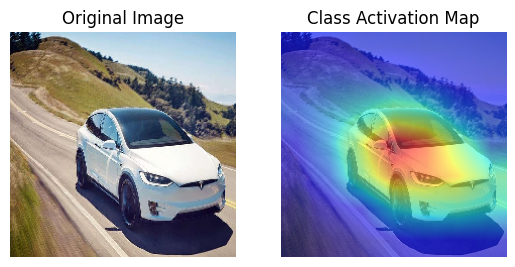

In [8]:
# Plot the original image and the CAM side by side
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cam, cmap='jet', alpha=0.9)
plt.imshow(img, alpha=0.4)
plt.title('Class Activation Map')
plt.axis('off')
plt.show()